In [57]:
import csv
import json
import os
import pandas as pd 
import time 
import numpy as np
import re
from vaderSentiment.vaderSentiment import SentimentIntensityAnalyzer
import matplotlib.pyplot as plt
import seaborn as sns
from wordcloud import WordCloud, ImageColorGenerator
from nltk.corpus import stopwords
from nltk.tokenize import word_tokenize
from sklearn.feature_extraction.text import TfidfVectorizer, CountVectorizer
from sklearn.naive_bayes import MultinomialNB

In [5]:
with open  ('/home/nora/a-star-anise-student-code/final_project/data/stripper_tag.json', 'r') as file:
     stripper = json.loads(file.read())
print(stripper['edge_hashtag_to_media'])


{'count': 969408, 'page_info': {'has_next_page': True, 'end_cursor': 'QVFDYm9KY21lYU1mc2NmMGoyWmJnRkRFLWFnZGJrWk5uVHU2MlJGR0Ewem53dUx2UUJNcDRhV3owRk9ET0xab21obkkyN3BVVWotU1VRdEs4SFc1Q0NTZA=='}, 'edges': [{'node': {'comments_disabled': False, '__typename': 'GraphVideo', 'id': '2510272845504818424', 'edge_media_to_caption': {'edges': [{'node': {'text': 'Magick on a snow day 💋💜\n\nTarot readings and personal content always available, DM for rates. $vibrantmissviolet \n\n#witch #witchesofinstagram #spellwork #petition #manifestation #magick #candlemack #spiritwork #medium #stripper #hypnotherapist #witch #fire #passion #desire #knowing'}}]}, 'shortcode': 'CLWR9pdn6z4', 'edge_media_to_comment': {'count': 0}, 'taken_at_timestamp': 1613468032, 'dimensions': {'height': 750, 'width': 750}, 'display_url': 'https://instagram.ftxl2-1.fna.fbcdn.net/v/t51.2885-15/e35/149932404_1598526493691384_1838406745854045395_n.jpg?_nc_ht=instagram.ftxl2-1.fna.fbcdn.net&_nc_cat=108&_nc_ohc=Vfal3GXE3HEAX8-633G&tp

In [6]:
captions_and_tags = []
for n in range(70):
    captions_and_tags.append(stripper['edge_hashtag_to_media']['edges'][n]['node']['edge_media_to_caption']['edges'][0]['node']['text'])
df = pd.DataFrame({"json_type": ['stripper'] * len(captions_and_tags), "raw_text":captions_and_tags})




In [7]:
df.head()

,json_type,raw_text
0,stripper,Magick on a snow day 💋💜\n\nTarot readings and ...
1,stripper,I just don't 😝💋\n\n$vibrantmissviolet\n\n#stri...
2,stripper,I feel it in my fingers\nI feel it in my toes\...
3,stripper,japanese strip\n\nodoriko\n\n#stripper #amanou...
4,stripper,buss it 😜 \n#dancersofinstagram #dancer #dance...


In [8]:
df.head()

,json_type,raw_text
0,stripper,Magick on a snow day 💋💜\n\nTarot readings and ...
1,stripper,I just don't 😝💋\n\n$vibrantmissviolet\n\n#stri...
2,stripper,I feel it in my fingers\nI feel it in my toes\...
3,stripper,japanese strip\n\nodoriko\n\n#stripper #amanou...
4,stripper,buss it 😜 \n#dancersofinstagram #dancer #dance...


In [9]:
#def load_data():
all_jsons = []
path_to_json = '/home/nora/a-star-anise-student-code/final_project/data/'
all_files = [file for file in os.listdir(path_to_json) if file.endswith('.json')]
print(all_files)
for file in all_files:
        file_path = path_to_json + file
        with open(file_path,'r') as f:
            current_json = json.loads(f.read())
        #this calcualtes the length of the values in that section of the post - how many posts?
        length = sum([len(x.values()) for x in current_json['edge_hashtag_to_media']['edges']])
        all_jsons.append((file.split('_')[0],length,current_json)) #this tuple contains = the name of the file, then the length, then the raw json

['topsurgery_tag.json', 'transsexual_tag.json', 'bodywork_tag.json', 'harness_tag.json', 'shadowbanned_tag.json', 'trans_tag.json', 'feminism_tag.json', 'blacklivesmatter_tag.json', 'queerfeminism_tag.json', 'transgender_tag.json', 'queer_tag.json', 'protest_tag.json', 'nonprofit_tag.json', 'peace_tag.json', 'bodypositivitybody_tag.json', 'lgbtqi_tag.json', 'prochoice_tag.json', 'equalrights_tag.json', 'feminist_tag.json', 'intersex_tag.json', 'ableism_tag.json', 'gender_tag.json', 'pansexuals_tag.json', 'blm_tag.json', 'transsexwork_tag.json', 'socialjustice_tag.json', 'sexeducation_tag.json', 'enby_tag.json', 'womenrights_tag.json', 'fightheteronormativity_tag.json', 'stripper_tag.json', 'qtbipoc_tag.json', 'gendernonconforming_tag.json', 'activism_tag.json', 'loveislove_tag.json']


In [10]:
all_dfs = []
for i, json in enumerate(all_jsons):
    captions_and_tags = []
    name = json[0]
    length = json[1]
    raw_json = json[2]
    for n in range(length):
        try:
            captions_and_tags.append(raw_json['edge_hashtag_to_media']['edges'][n]['node']['edge_media_to_caption']['edges'][0]['node']['text'])
        except:
            pass
    df = pd.DataFrame({"json_type": [f'{name}'] * len(captions_and_tags), "raw_text":captions_and_tags})
    all_dfs.append(df)

df = pd.concat(all_dfs,axis=0)

In [11]:
df.shape

(2344, 2)

In [12]:
df.head()

,json_type,raw_text
0,topsurgery,Apariția unui lipom poate părea înfricoșătoare...
1,topsurgery,Follow @crazydoctors_\nFor more post daily 😃. ...
2,topsurgery,"Patch \n\nDrawing, acrylic and watercolour pai..."
3,topsurgery,And the deeper you become the more some don’t ...
4,topsurgery,Alok V Menon \n\n#transisbeautiful #figurestud...


In [13]:
def hashtags(x):
    pattern = r'\#[a-zA-Z]+'
    hashtags = re.findall(pattern,x)
    #captions = re.sub(pattern,'',x)
    return hashtags

def captions(x):
    pattern = r'\#[a-zA-Z]+'
    #hashtags = re.findall(pattern,x)
    captions = re.sub(pattern,'',x)
    return captions

def key_word_search(x):
    '''Identifies which posts comment about having been deleted/removed or deactivated, 
    OR whose accounts was paused for 30days'''
    #[]'post deleted again', 'community guidelines be fronting',
                        #'post removed','account deactivated for 30 days',
    possible_captions = ['deactivated', 'deactivate', 'targeted', 'target', 'deleted', 'delete' 'removed', 'remove', 'silenced', 'silence', 'I am done','bre']
    do_i_match = 0
    #imporove  - fuzzy matching, more keywords in the list
    for caption in possible_captions:
        if caption in x:
            do_i_match +=1
    if do_i_match == 0:
        return False
    else:
        return True
    
s = SentimentIntensityAnalyzer()    
def sentiment(x):
    score = s.polarity_scores(x)['compound']
    return score    

In [14]:
df['hashtags'] = df.raw_text.apply(hashtags)
df['captions'] = df.raw_text.apply(captions)
df['keyword_present'] = df.captions.apply(key_word_search)
df['sentiment'] = df.captions.apply(sentiment)

In [15]:
df.head()

,json_type,raw_text,hashtags,captions,keyword_present,sentiment
0,topsurgery,Apariția unui lipom poate părea înfricoșătoare...,"[#citymed, #citymedarad, #medicalcenter, #surg...",Apariția unui lipom poate părea înfricoșătoare...,False,0.5411
1,topsurgery,Follow @crazydoctors_\nFor more post daily 😃. ...,"[#futuredoctor, #medicalschool, #sportsmedicin...",Follow @crazydoctors_\nFor more post daily 😃. ...,False,0.9196
2,topsurgery,"Patch \n\nDrawing, acrylic and watercolour pai...","[#nonbinary, #neutrois, #they, #genderaffirmat...","Patch \n\nDrawing, acrylic and watercolour pai...",False,0.9794
3,topsurgery,And the deeper you become the more some don’t ...,"[#ftm, #femaletomale, #transmenofig, #vitamint...",And the deeper you become the more some don’t ...,False,-0.4601
4,topsurgery,Alok V Menon \n\n#transisbeautiful #figurestud...,"[#transisbeautiful, #figurestudy, #watercolour...",Alok V Menon \n\n,False,0.0000


In [16]:
df.keyword_present.sum()

87

In [17]:
df.isna().any

<bound method DataFrame.any of     json_type  raw_text  hashtags  captions  keyword_present  sentiment
0       False     False     False     False            False      False
1       False     False     False     False            False      False
2       False     False     False     False            False      False
3       False     False     False     False            False      False
4       False     False     False     False            False      False
..        ...       ...       ...       ...              ...        ...
62      False     False     False     False            False      False
63      False     False     False     False            False      False
64      False     False     False     False            False      False
65      False     False     False     False            False      False
66      False     False     False     False            False      False

[2344 rows x 6 columns]>

In [18]:
df

,json_type,raw_text,hashtags,captions,keyword_present,sentiment
0,topsurgery,Apariția unui lipom poate părea înfricoșătoare...,"[#citymed, #citymedarad, #medicalcenter, #surg...",Apariția unui lipom poate părea înfricoșătoare...,False,0.5411
1,topsurgery,Follow @crazydoctors_\nFor more post daily 😃. ...,"[#futuredoctor, #medicalschool, #sportsmedicin...",Follow @crazydoctors_\nFor more post daily 😃. ...,False,0.9196
2,topsurgery,"Patch \n\nDrawing, acrylic and watercolour pai...","[#nonbinary, #neutrois, #they, #genderaffirmat...","Patch \n\nDrawing, acrylic and watercolour pai...",False,0.9794
3,topsurgery,And the deeper you become the more some don’t ...,"[#ftm, #femaletomale, #transmenofig, #vitamint...",And the deeper you become the more some don’t ...,False,-0.4601
4,topsurgery,Alok V Menon \n\n#transisbeautiful #figurestud...,"[#transisbeautiful, #figurestudy, #watercolour...",Alok V Menon \n\n,False,0.0000
...,...,...,...,...,...,...
62,loveislove,14 Luty ❤️\n\n#polishgirl #polskadziewczyna #i...,"[#polishgirl, #polskadziewczyna, #instagood, #...",14 Luty ❤️\n\n 4likes,False,0.0000
63,loveislove,what's your pleasure 💜\n📷: @x_odus\n\n#gayprid...,"[#gaypride, #gay, #gayboy, #instagay, #gaylove...",what's your pleasure 💜\n📷: @x_odus\n\n ...,False,0.8360
64,loveislove,sour puss 🐱\n\n#gaypride #gay #gayboy #instaga...,"[#gaypride, #gay, #gayboy, #instagay, #gaylove...",sour puss 🐱\n\n,False,0.0000
65,loveislove,the (over)thinker\n📸: @davidsharpart\n\n#gaypr...,"[#gaypride, #gay, #gayboy, #instagay, #gaylove...",the (over)thinker\n📸: @davidsharpart\n\n ...,False,0.0000


In [170]:
# get top positive hashtags
top_pos_hashtags = df.loc[df['sentiment'] > 0.9]
toptag = top_pos_hashtags.drop(['raw_text','hashtags','captions', 'keyword_present'], axis=1)
toptags = toptag.set_index('json_type')

In [162]:
top_hashtags = toptags.groupby('json_type')[['sentiment']].mean().sort_values(by='sentiment')

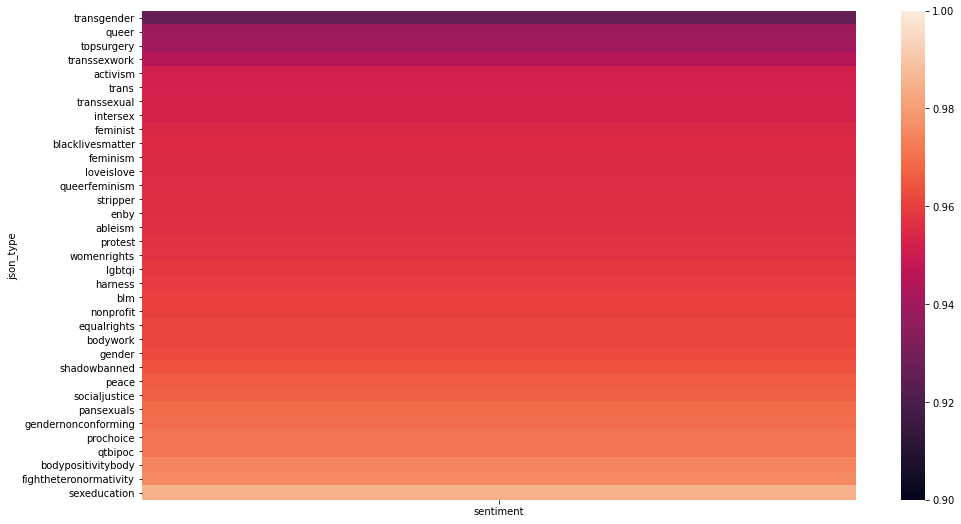

In [203]:
plt.figure(figsize=(16,9)) 
sns.heatmap(top_hashtags, vmin = 0.9, vmax = 1)
plt.savefig("top positive hashtags.jpeg")

In [21]:
# stats on the sentiment
neg_sentiment =df.loc[df['sentiment'] < 0]
neg_sentiment

,json_type,raw_text,hashtags,captions,keyword_present,sentiment
3,topsurgery,And the deeper you become the more some don’t ...,"[#ftm, #femaletomale, #transmenofig, #vitamint...",And the deeper you become the more some don’t ...,False,-0.4601
5,topsurgery,Just living vicariously through photo manipula...,"[#oneday, #topsurgery, #teetyeet, #comingsoon,...",Just living vicariously through photo manipula...,False,-0.2960
12,topsurgery,With Dr. Kodeih’s extensive experience in the ...,[],With Dr. Kodeih’s extensive experience in the ...,True,-0.2263
13,topsurgery,Whether you're considering cosmetic or reconst...,[],Whether you're considering cosmetic or reconst...,False,-0.1531
34,topsurgery,"despite popular belief, abbacchio is at home w...","[#anime, #manga, #animedrawing, #illustration,...","despite popular belief, abbacchio is at home w...",False,-0.3252
...,...,...,...,...,...,...
32,activism,Dumping culture in SL is the root cause of why...,[],Dumping culture in SL is the root cause of why...,True,-0.9627
33,activism,Civil rights activist Jolovan Wham was fined S...,"[#jolovanwham, #singapore, #sgactivism, #activ...",Civil rights activist Jolovan Wham was fined S...,False,-0.6908
43,activism,"Myanmar's troubled history: Coups, Military Ru...","[#myanmar, #savemyanmar, #savemyanmar, #democr...","Myanmar's troubled history: Coups, Military Ru...",False,-0.4588
45,activism,Get involved with the socialist club at UWA. W...,"[#uwa, #uwastudents, #activism, #socialism, #s...",Get involved with the socialist club at UWA. W...,True,-0.5859


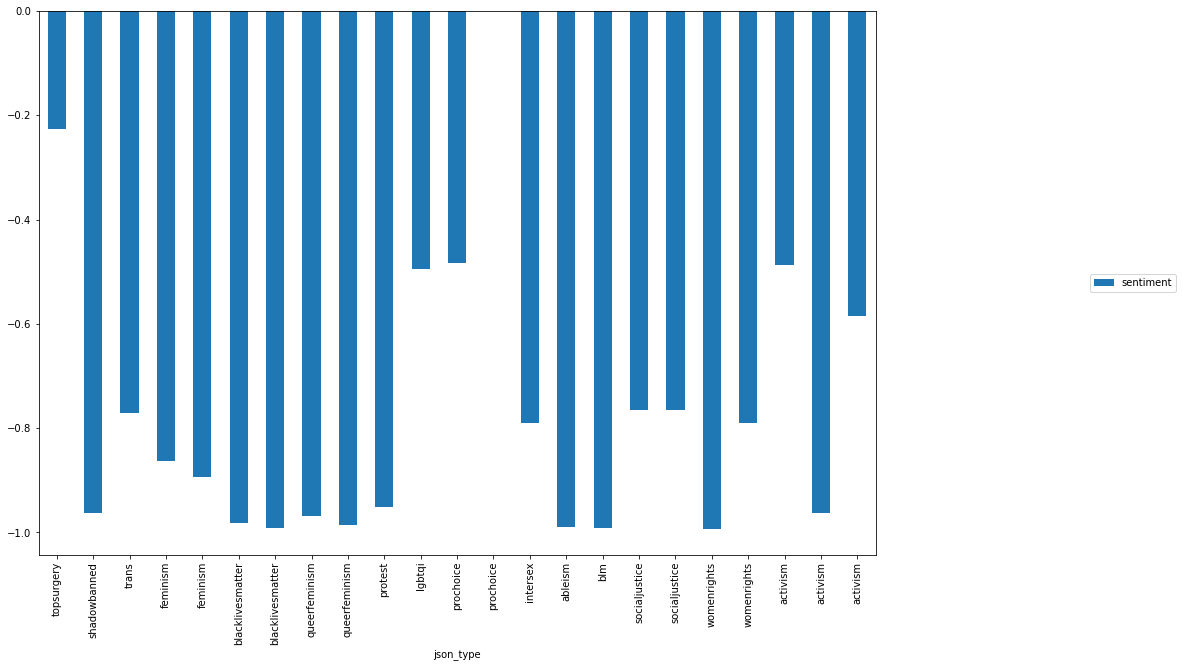

In [204]:
banned_neg_sent = neg_sentiment.loc[neg_sentiment['keyword_present'] == True]
banned_neg_sent.groupby('json_type')[['sentiment']].mean().sort_values(by='sentiment')
banned_neg_sent.plot.bar(x = 'json_type', figsize=(15,10)).legend(loc='center left', bbox_to_anchor=(1.25, 0.5), ncol=1)
plt.savefig("negative viewed hashstags.jpeg")

In [ ]:
class WordCloudGeneration:
    def preprocessing(self, data):
        # convert all words to lowercase
        data = [item.lower() for item in data]
        # load the stop_words of english
        stop_words = set(stopwords.words('english'))
        # concatenate all the data with spaces.
        paragraph = ' '.join(data)
        # tokenize the paragraph using the inbuilt tokenizer
        word_tokens = word_tokenize(paragraph) 
        # filter words present in stopwords list 
        preprocessed_data = ' '.join([word for word in word_tokens if not word in stop_words])
        print("\n Preprocessed Data: " ,preprocessed_data)
        return preprocessed_data

    def create_word_cloud(self, final_data):
        # initiate WordCloud object with parameters width, height, maximum font size and background color
        # call the generate method of WordCloud class to generate an image
        wordcloud = WordCloud(width=1600, height=800, max_font_size=200, background_color="black").generate(final_data)
        # plt the image generated by WordCloud class
        plt.figure(figsize=(12,10))
        plt.imshow(wordcloud)
        plt.axis("off")
        plt.show()

In [23]:
only_neg_sentiment = banned_neg_sent.drop(['raw_text','hashtags','captions','sentiment'], axis=1)
only_neg_sentiment

,json_type,keyword_present
12,topsurgery,True
67,shadowbanned,True
49,trans,True
17,feminism,True
65,feminism,True
11,blacklivesmatter,True
67,blacklivesmatter,True
4,queerfeminism,True
33,queerfeminism,True
43,protest,True


In [151]:
string_of_only_neg_sentiment = [' '.join(x) for x in only_pos_sentiment['json_type']]
string_of_only_neg_sentiment

['t o p s u r g e r y',
 't o p s u r g e r y',
 't r a n s s e x u a l',
 'b o d y w o r k',
 'b o d y w o r k',
 'b o d y w o r k',
 'b o d y w o r k',
 'h a r n e s s',
 's h a d o w b a n n e d',
 's h a d o w b a n n e d',
 's h a d o w b a n n e d',
 't r a n s',
 't r a n s',
 'f e m i n i s m',
 'b l a c k l i v e s m a t t e r',
 'b l a c k l i v e s m a t t e r',
 'q u e e r f e m i n i s m',
 'q u e e r f e m i n i s m',
 't r a n s g e n d e r',
 'q u e e r',
 'n o n p r o f i t',
 'n o n p r o f i t',
 'p e a c e',
 'l g b t q i',
 'l g b t q i',
 'l g b t q i',
 'p r o c h o i c e',
 'e q u a l r i g h t s',
 'f e m i n i s t',
 'i n t e r s e x',
 'i n t e r s e x',
 'i n t e r s e x',
 'i n t e r s e x',
 'a b l e i s m',
 'a b l e i s m',
 'b l m',
 't r a n s s e x w o r k',
 's o c i a l j u s t i c e',
 'e n b y',
 'w o m e n r i g h t s',
 'w o m e n r i g h t s',
 'w o m e n r i g h t s',
 'w o m e n r i g h t s',
 'w o m e n r i g h t s',
 's t r i p p e r',
 'q 

In [25]:
pos_sentiment = df.loc[df['sentiment'] > 0]
pos_sentiment

,json_type,raw_text,hashtags,captions,keyword_present,sentiment
0,topsurgery,Apariția unui lipom poate părea înfricoșătoare...,"[#citymed, #citymedarad, #medicalcenter, #surg...",Apariția unui lipom poate părea înfricoșătoare...,False,0.5411
1,topsurgery,Follow @crazydoctors_\nFor more post daily 😃. ...,"[#futuredoctor, #medicalschool, #sportsmedicin...",Follow @crazydoctors_\nFor more post daily 😃. ...,False,0.9196
2,topsurgery,"Patch \n\nDrawing, acrylic and watercolour pai...","[#nonbinary, #neutrois, #they, #genderaffirmat...","Patch \n\nDrawing, acrylic and watercolour pai...",False,0.9794
6,topsurgery,hey everyone! im almost 1/3rd of the way to my...,"[#topsurgery, #topsurgeryfund, #crowdfunding, ...",hey everyone! im almost 1/3rd of the way to my...,False,0.9924
7,topsurgery,I got a new phone and the camera is pretty ban...,"[#topsurgery, #nonbinary, #nonbinarytopsurgery...",I got a new phone and the camera is pretty ban...,True,0.9895
...,...,...,...,...,...,...
57,loveislove,Good morning ✨🖤\n.\n.\n.\n.\n.\n.\n.\n.\n.\n.\...,"[#goodmorning, #couple, #happy, #gay, #selfie,...",Good morning ✨🖤\n.\n.\n.\n.\n.\n.\n.\n.\n.\n.\...,False,0.8555
58,loveislove,🖤\nParis with (my) love\n\n#outfit #outfitofth...,"[#outfit, #outfitoftheday, #outfitinspiration,...",🖤\nParis with (my) love\n\n,False,0.8555
60,loveislove,In l❤️ve con Alicante \n\n#love #instagood #ha...,"[#love, #instagood, #happy, #look, #cute, #lik...",In l❤️ve con Alicante \n\n ...,False,0.4588
61,loveislove,❤ I wish you LOVE everyday \nH A P P Y V A L ...,"[#valentinesday, #valentines, #myvalentine, #v...",❤ I wish you LOVE everyday \nH A P P Y V A L ...,False,0.9728


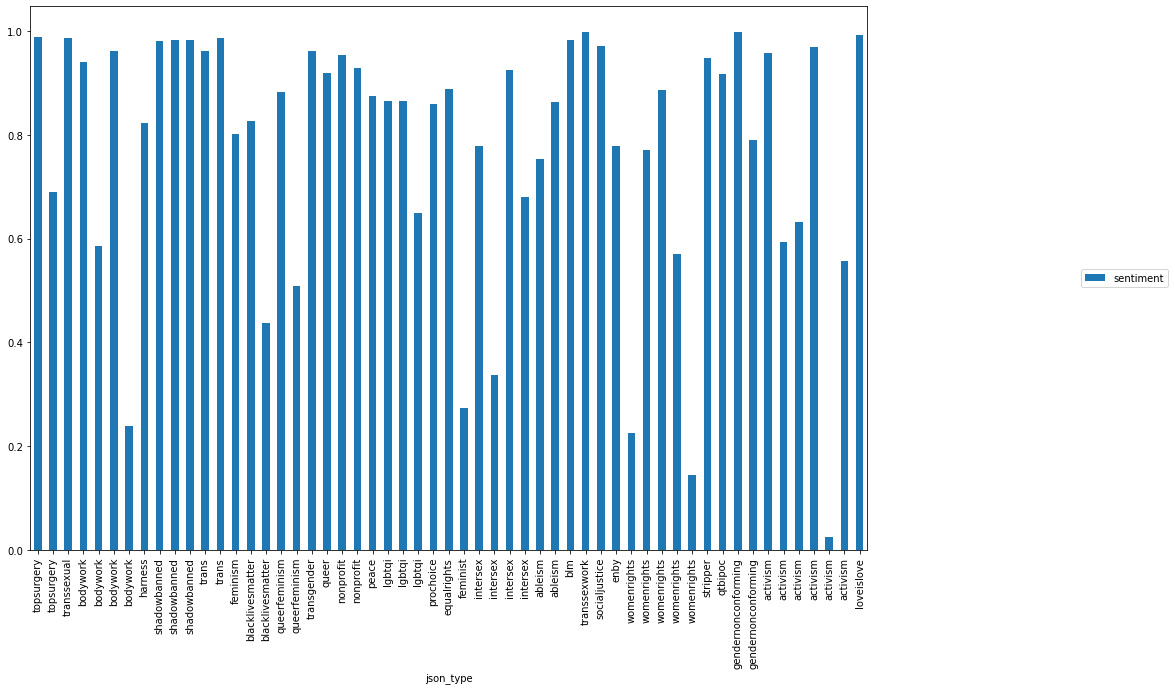

In [26]:
banned_pos_sent = pos_sentiment.loc[pos_sentiment['keyword_present'] == True]
banned_pos_sent.plot.bar(x = 'json_type', figsize=(15,10)).legend(loc='center left', bbox_to_anchor=(1.25, 0.5), ncol=1)

In [27]:
only_pos_sentiment = banned_pos_sent.drop(['raw_text','hashtags','captions','sentiment'], axis=1)
only_pos_sentiment

,json_type,keyword_present
7,topsurgery,True
70,topsurgery,True
6,transsexual,True
0,bodywork,True
12,bodywork,True
54,bodywork,True
57,bodywork,True
8,harness,True
6,shadowbanned,True
19,shadowbanned,True


In [159]:
string_of_positive_banned_hashtags = ' '.join([' '.join(x) for x in only_pos_sentiment['json_type']])
string_of_positive_banned_hashtags

't o p s u r g e r y t o p s u r g e r y t r a n s s e x u a l b o d y w o r k b o d y w o r k b o d y w o r k b o d y w o r k h a r n e s s s h a d o w b a n n e d s h a d o w b a n n e d s h a d o w b a n n e d t r a n s t r a n s f e m i n i s m b l a c k l i v e s m a t t e r b l a c k l i v e s m a t t e r q u e e r f e m i n i s m q u e e r f e m i n i s m t r a n s g e n d e r q u e e r n o n p r o f i t n o n p r o f i t p e a c e l g b t q i l g b t q i l g b t q i p r o c h o i c e e q u a l r i g h t s f e m i n i s t i n t e r s e x i n t e r s e x i n t e r s e x i n t e r s e x a b l e i s m a b l e i s m b l m t r a n s s e x w o r k s o c i a l j u s t i c e e n b y w o m e n r i g h t s w o m e n r i g h t s w o m e n r i g h t s w o m e n r i g h t s w o m e n r i g h t s s t r i p p e r q t b i p o c g e n d e r n o n c o n f o r m i n g g e n d e r n o n c o n f o r m i n g a c t i v i s m a c t i v i s m a c t i v i s m a c t i v i s m a c t i v i s m a c t i v i s

In [29]:
# banning based on hashtags - either do stats on 87, or broaden your keyword search
banned = df.loc[df['keyword_present'] == True]
banned

,json_type,raw_text,hashtags,captions,keyword_present,sentiment
7,topsurgery,I got a new phone and the camera is pretty ban...,"[#topsurgery, #nonbinary, #nonbinarytopsurgery...",I got a new phone and the camera is pretty ban...,True,0.9895
12,topsurgery,With Dr. Kodeih’s extensive experience in the ...,[],With Dr. Kodeih’s extensive experience in the ...,True,-0.2263
70,topsurgery,Hoy os traemos nuestra primera publicación des...,"[#transguy, #transman, #transmasculine, #queer...",Hoy os traemos nuestra primera publicación des...,True,0.6900
6,transsexual,❤Everyone just take a look at breathtaking @mi...,"[#transgirl, #transbeauty, #beautyoftrans, #on...",❤Everyone just take a look at breathtaking @mi...,True,0.9872
38,transsexual,break up with your girlfriend.,[],break up with your girlfriend.,True,0.0000
...,...,...,...,...,...,...
37,activism,🔥Still buzzing after last week's 'Towards Eart...,"[#earthcentred, #ecocentric, #paradigmshift, #...",🔥Still buzzing after last week's 'Towards Eart...,True,0.9685
41,activism,The youth can not be intimated into silence. \...,"[#DishaRavi, #FingerOnYourLips, #ReleaseDishaR...",The youth can not be intimated into silence. \...,True,0.0258
45,activism,Get involved with the socialist club at UWA. W...,"[#uwa, #uwastudents, #activism, #socialism, #s...",Get involved with the socialist club at UWA. W...,True,-0.5859
64,activism,Trump is getting hammered by The Supreme Court...,"[#supremecourt, #trump, #transgender, #gayprid...",Trump is getting hammered by The Supreme Court...,True,0.5574


In [155]:
big_long_string_of_all_banned_hashtags = ' '.join([' '.join(x) for x in banned['hashtags']])
big_long_string_of_all_banned_hashtags

'#topsurgery #nonbinary #nonbinarytopsurgery #theythem #poc #trans #lgbt #lgbtq #nonbinarytrans #transofcolor #transgender #transisbeautiful #afab #thisiswhattranslookslike #transandproud #drgallagher #drsidhbhgallagher  #transguy #transman #transmasculine #queer #topsurgery #mastectomia #trans #transexual #testex #testosterone #transvisibility #pride #lgtbi #transgenero #transgender #transformation #change #histerectomia #sex #change #photographer #textosbonitos #frasesmotivadoras #adolescentes #frasesdiarias #textos #transwoman #ftm #mtf #lgbt #transgirl #transbeauty #beautyoftrans #onlytrans #transpride #love #loveandrespect #trans #transsexual #transsupport  #breathwork #movement #yoga #bodywork #pranayama #alchemyofbreath #bbtrs #feeltoheal #timeforchange #connection #healing #consciousness #innerstrength #selfempowerment #divingdeep #selflove #lovecomesfirst #lungs #breathbiology #biology #celebration #lightandlove #poweroflove #floweroflove   #k #chevytruck #happyvalentinesday #

In [133]:
unique_list_of_hashtags = set(big_long_string_of_all_banned_hashtags) #big long lsit ofbanned hashtags but with not duplicates

In [134]:
hashtag_based_on_json_type = {}

for json_type in banned.json_type.unique():
    short = df[df['json_type'] == json_type]
    short_list_of_banned_hashtags = ' '.join([' '.join(x) for x in short['hashtags']])
    hashtag_based_on_json_type[json_type] = short_list_of_banned_hashtags
    
# banned hashtags grouped by json type

In [176]:
hashtag_based_on_json_type['socialjustice']

'#Sustainability #Environment #SocialJustice #Kindness #BeKind #Charity #Marketing #accessibilty #yoga #tutorial #imageDesctiption #PhotoDescription #AlbinismAwareness #blind #vi #autism #SocialJustice #access #lieferkettengesetz #lieferkettengesetzjetzt #lieferkettenverantwortung #menschenrechte #umweltschutz #supplychain #socialjustice #FlashCard #goodgovernance #nonprofitgovernance #nonprofitleadership #leadership #boardgovernance #boardgovernanceleadership #forimpactorganization #businesswithpurpose #kindnesscurator #nonprofitboard #nonprofitconsulting #socialjustice #currentaffairs #internationalrelations #npogovernance #humanrights #humanrightswatch #direitoshumanos #indriscrimina #indiscrimination #socialjustice #justi #aupair #aupairlife #brasileiraspelomundo #stopmorissonsirbill #socialimpact #change #bethechange #community #leadership #sdgs #globalgoals #socialjustice #equity #socialchange #education #school #learning #students #motivation #changemakers #children #kids #stude

In [132]:
big_long_string_of_all_banned_hashtags

'#topsurgery #nonbinary #nonbinarytopsurgery #theythem #poc #trans #lgbt #lgbtq #nonbinarytrans #transofcolor #transgender #transisbeautiful #afab #thisiswhattranslookslike #transandproud #drgallagher #drsidhbhgallagher  #transguy #transman #transmasculine #queer #topsurgery #mastectomia #trans #transexual #testex #testosterone #transvisibility #pride #lgtbi #transgenero #transgender #transformation #change #histerectomia #sex #change #photographer #textosbonitos #frasesmotivadoras #adolescentes #frasesdiarias #textos #transwoman #ftm #mtf #lgbt #transgirl #transbeauty #beautyoftrans #onlytrans #transpride #love #loveandrespect #trans #transsexual #transsupport  #breathwork #movement #yoga #bodywork #pranayama #alchemyofbreath #bbtrs #feeltoheal #timeforchange #connection #healing #consciousness #innerstrength #selfempowerment #divingdeep #selflove #lovecomesfirst #lungs #breathbiology #biology #celebration #lightandlove #poweroflove #floweroflove   #k #chevytruck #happyvalentinesday #

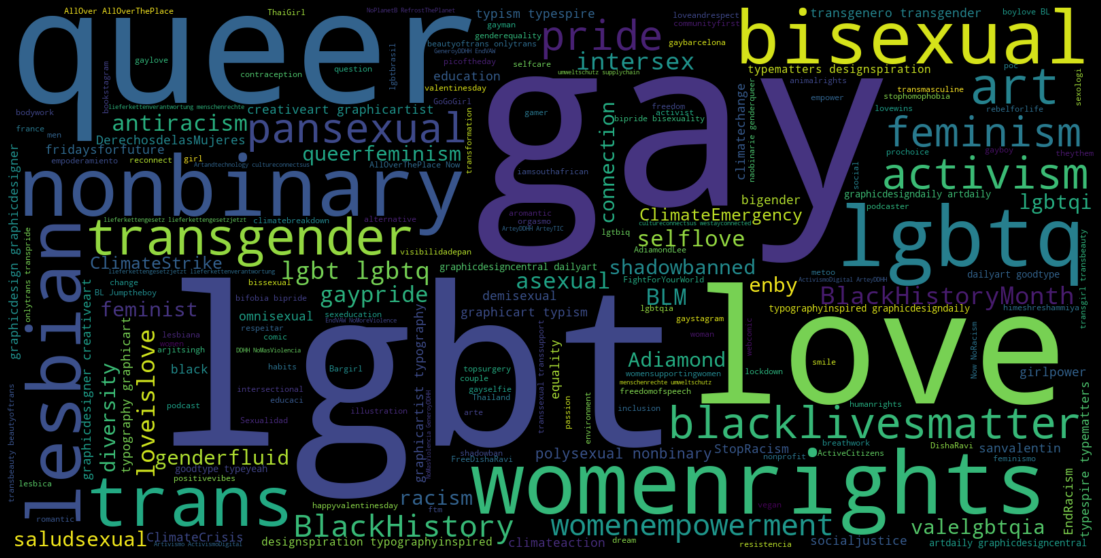

<Figure size 432x288 with 0 Axes>

In [209]:
# wordcloud for all hashstags where posts have been previously removed
wordcloud = WordCloud(width=1600, height=800).generate(big_long_string_of_all_banned_hashtags)
plt.figure( figsize=(20,10), facecolor='k')
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis("off")
plt.show()
plt.savefig("all hashtags that have been removed from collection.png")

In [ ]:
#statistics on the hashtags - cross reference the json type

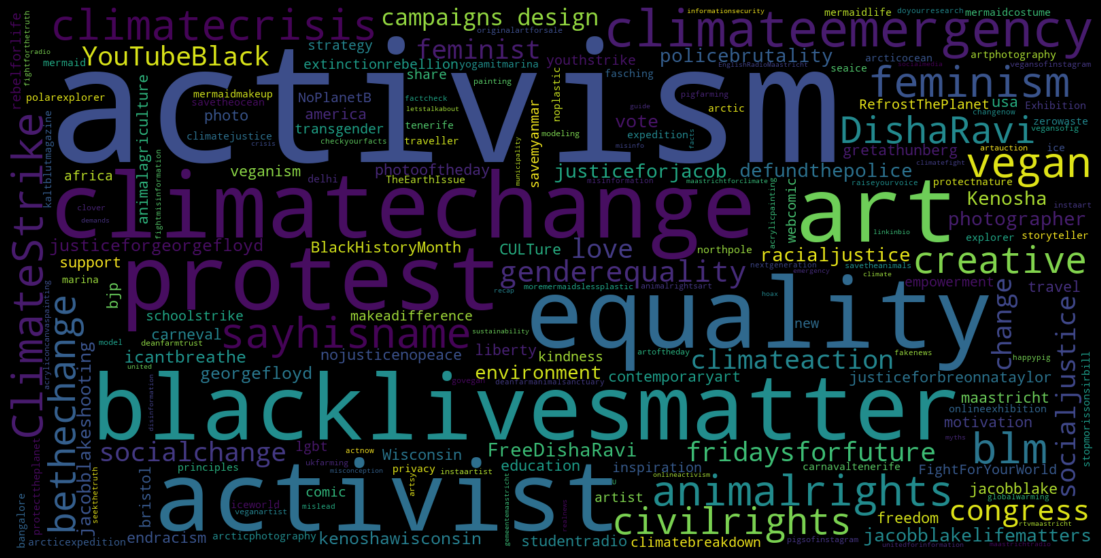

<Figure size 432x288 with 0 Axes>

In [206]:
# wordcloud for activism where posts had been removed
wordcloud = WordCloud(width=1600, height=800).generate(hashtag_based_on_json_type['activism'])  
plt.figure( figsize=(20,10), facecolor='k')
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis("off")
plt.show()
plt.savefig("activism hashtag combination with high to low removal rate.jpeg")

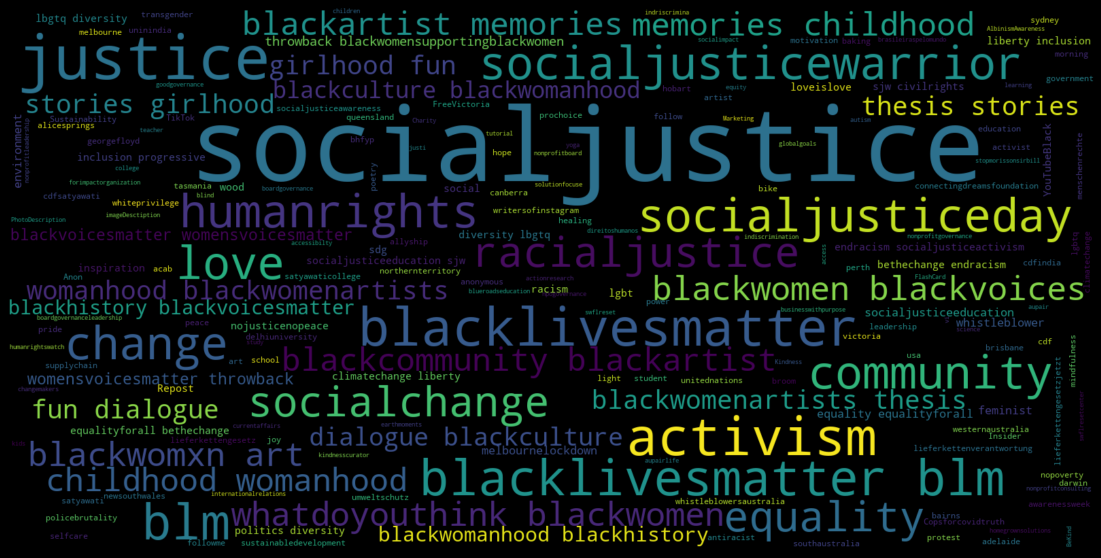

<Figure size 432x288 with 0 Axes>

In [207]:
# wordcloud for socialjustice where posts had been removed
wordcloud = WordCloud(width=1600, height=800).generate(hashtag_based_on_json_type['socialjustice']) 
plt.figure( figsize=(20,10), facecolor='k')
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis("off")
plt.show()
plt.savefig("socialjustice hashtag combination with high to low removal rate.jpeg")

In [198]:
hashtag_based_on_json_type['queerfeminism']

' #gender #genderfluid #queerideology #queerart #Queerfeminismus #queerfeminism #radicalfeminism #radfem #radfeminist #bookstagramdeutschland #bookstagramgermany #bookstagramofgermany #germanbookstagram #bookstagram #leseratte #b #buchblog #bookstagram #gaybookstagram #queerbookstagram #queerbooks #bookstagramsaarland #lesbisch #lesbian #queer #lgbtb #queerlit #queerfeminism #lgbtaktivismus #design #interactiondesign #queerfeminism #interaction #talk #lecture #privileges #intersectionality #feminism #feministdesign #intersectionalfeminism #feminist #zhdk #BlackHistoryMonth #comingsoon #magazin #staytuned #utopoi #utopoimagazin #loading #diversity #identity #lgbtq #queer #identita #feminist #migrant #poc #BiPoC #intersectional #queerfeminism #perspective #interfaith #opencall  #diy #queerfeminism #diyzine #riot #mybodymychoice #safeabortion #selbstbestimmung #abortionrights #safeabortion #feministischerstreikn #frauenundqueersstreik #frauenstreik #flintkomiteenbg #stopviolence #raiseyou

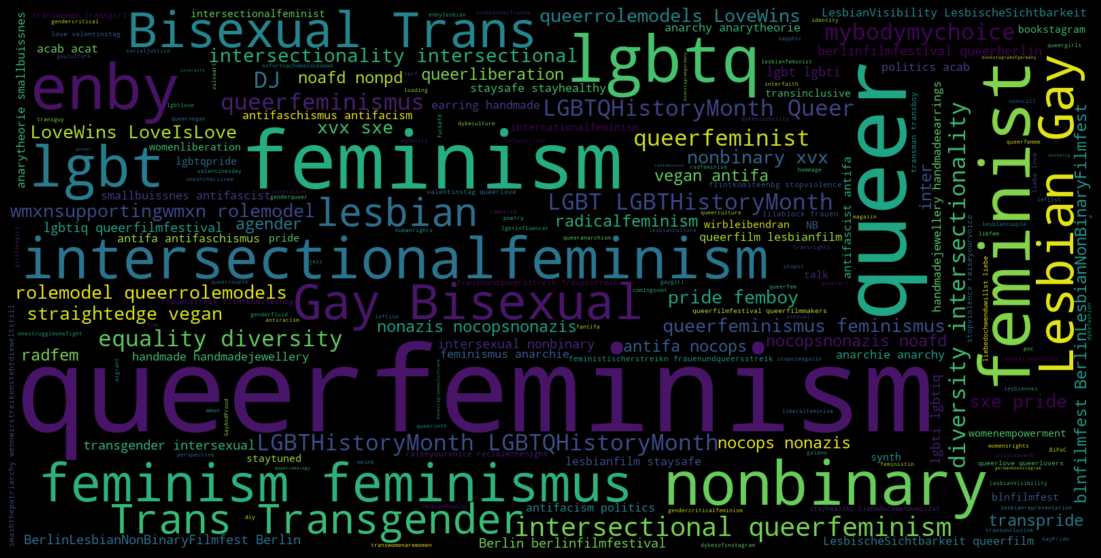

<Figure size 432x288 with 0 Axes>

In [208]:
# wordcloud for socialjustice where posts had been removed
wordcloud = WordCloud(width=1600, height=800).generate(hashtag_based_on_json_type['queerfeminism'])
plt.figure( figsize=(20,10), facecolor='k')
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis("off")
plt.show()
plt.savefig("queerfeminism hashtag combination with high to low removal rate.jpeg")

In [107]:
# predict which hashtags are most likely to be banned through applying tfidf Vectorizor

In [183]:
df_changed = banned.drop(['raw_text','captions','sentiment'], axis=1)
df_changed #= [x for x in df.split('''""[],''')]

,json_type,hashtags,keyword_present
7,topsurgery,"[#topsurgery, #nonbinary, #nonbinarytopsurgery...",True
12,topsurgery,[],True
70,topsurgery,"[#transguy, #transman, #transmasculine, #queer...",True
6,transsexual,"[#transgirl, #transbeauty, #beautyoftrans, #on...",True
38,transsexual,[],True
...,...,...,...
37,activism,"[#earthcentred, #ecocentric, #paradigmshift, #...",True
41,activism,"[#DishaRavi, #FingerOnYourLips, #ReleaseDishaR...",True
45,activism,"[#uwa, #uwastudents, #activism, #socialism, #s...",True
64,activism,"[#supremecourt, #trump, #transgender, #gayprid...",True


In [184]:
cv = CountVectorizer()
cv.fit(df_changed)
vec_df = cv.transform(df_changed)
vec_df.todense()

tf = TfidfVectorizer()
tf.fit(df_changed)
tf_vec_df = tf.transform(df_changed)

In [185]:
new_df = pd.DataFrame(tf_vec_df.todense().round(2), columns=cv.get_feature_names())
new_df

m = MultinomialNB()
X = new_df
y= new_df.index

m.fit(X,y)
new_input = ["hello"]
vector_input = tf.transform(new_input)
ypred = m.predict(vector_input)
print(ypred)

[0]
